# pinecone-client: Python client for Pinecone, a vector database used for storing and searching embeddings, enabling fast and efficient similarity search in retrieval-based applications.

cohere: Provides access to Cohere's large language models for text generation and NLP tasks like question-answering, summarization, and content creation via their API.

transformers: A Hugging Face library offering pre-trained models (e.g., BERT, GPT) for various NLP tasks such as text embedding, generation, and classification.

datasets: A Hugging Face library providing access to diverse datasets, simplifying the process of loading, preprocessing, and handling large datasets for machine learning and NLP.

In [70]:
!pip install -q pinecone-client cohere transformers datasets


# This is a trial code generates 768-dimensional embeddings for documents using SentenceTransformer and uploads them to a Pinecone index for vector search. It includes error handling for the upsert process.

In [71]:
import numpy as np
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec

# Initialize Pinecone with API key
api_key = "d5f35eca-2cc2-4ceb-b6e7-45810f3a5b84"
pc = Pinecone(api_key=api_key)

# Index name
index_name = "document-embeddings"

# Step 1: Load a pre-trained sentence transformer model with 768-dimensional embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens')  # This model generates 768-dim embeddings

# Example documents to encode
documents = [
    "This is the first document.",
    "Here is another example document.",
    "Pinecone helps with vector search."
]

# Step 2: Generate embeddings for the documents (should be 768-dimensions)
embeddings = model.encode(documents)

# Step 3: Prepare data for upload (id and embeddings as list or numpy array)
data = [(str(i), embedding.tolist()) for i, embedding in enumerate(embeddings)]

# Step 4: Upsert (upload and insert) the embeddings to Pinecone
try:
    index = pc.Index(index_name)
    index.upsert(vectors=data)
    print("Embeddings upserted successfully!")
except Exception as e:
    print(f"Error during upsert: {e}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Embeddings upserted successfully!


In [73]:
response = co.generate(prompt="What is pinecone?", max_tokens=50)
print(response.generations[0].text)

 A pine cone is the seed-bearing fruiting body of pines, comprising a woody, cone-shaped structure that develops on the ends of pine tree branches. They are primarily produced by plants in the genus Pinus, which includes more than 110 species


# **Starting the code from here , installing important packages**

In [74]:
!pip install PyPDF2


In [75]:
import os
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec
import PyPDF2

# Extract Text from PDF: This function reads a PDF file and gathers all the text from its pages.

# Initialize Pinecone: This sets up Pinecone with the provided API key.

In [76]:
# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()  # Extract text from each page
    return text

# Initialize Pinecone with API key
pc = Pinecone(api_key="d5f35eca-2cc2-4ceb-b6e7-45810f3a5b84")

In [77]:
# Index name
index_name = "document-embeddings"

# Create Index if Not Exists: Checks if the index is present. If not, creates it with specified dimensions and metric, using AWS serverless configuration.

# Connect to Index: Connects to the created or existing index.

In [78]:
# Create index if it doesn't exist
if index_name not in [index.name for index in pc.list_indexes()]:
    pc.create_index(
        name=index_name,
        dimension=768,  # The dimensionality of the embeddings
        metric='cosine',  # You can use 'euclidean', 'cosine', or other metrics
        spec=ServerlessSpec(cloud='aws', region='us-west-2')
    )

# Connect to the index
index = pc.Index(index_name)

# Load Model: Initialize a Sentence Transformer model with 768-dimensional embeddings.

Extract Text: Read and extract text from the specified PDF file.

Split Text: Divide the extracted text into 512-character chunks.

In [79]:
# Step 1: Load a pre-trained sentence transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')  # 768-dimensional embeddings

# Step 2: Extract text from the PDF
pdf_path = "/content/18.01.189.20241202.pdf"  # Replace with the path to your PDF file
pdf_text = extract_text_from_pdf(pdf_path)

# Step 3: Split the text into chunks (e.g., for long documents)
document_chunks = [pdf_text[i:i + 512] for i in range(0, len(pdf_text), 512)]  # Chunk by 512 characters

# # Step 4: Generate embeddings for the document chunks

In [80]:
# Step 4: Generate embeddings for the document chunks
embeddings = model.encode(document_chunks)

In [81]:
# Step 5: Prepare data for uploading to Pinecone
data = [(str(i), embedding.tolist()) for i, embedding in enumerate(embeddings)]

# # Step 6: Upsert the embeddings to Pinecone

In [82]:

# Step 6: Upsert the embeddings to Pinecone
try:
    index.upsert(vectors=data)
    print("Embeddings upserted successfully!")
except Exception as e:
    print(f"Error during upsert: {e}")

Embeddings upserted successfully!


# **Check the status of the index**

In [83]:

print(pc.describe_index(index_name))


{'deletion_protection': 'disabled',
 'dimension': 768,
 'host': 'document-embeddings-aux2jks.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'document-embeddings',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'}}


# Generate a response with a 500-token limit for the prompt "What is Neuralink surgical robot?" and print the result.

In [86]:
response = co.generate(prompt="What is Neuralink surgical robot?", max_tokens=500)
print(response.generations[0].text)


 The Neuralink surgical robot is a device developed by Neuralink, a company founded by Elon Musk in 2016. Neuralink aims to develop brain-computer interfaces (BCIs) that would allow paraplegics and quadriplegics to gain digital control over phones or computers via thought alone, initially starting with wired brain implants and eventually moving to wireless technology. 

The robot is a prototype multidisciplinary device, encompassing robotics, neuroscience, and infinitely repeatable precision surgery. It is designed to assist in the implantation of Neuralink's brain-computer interface (BCI) devices into the cortex of the brain. 

The robot is used for the insertion of very thin wires, each containing thousands of electrodes, into the brain to record neural activity. It operates within a large, suspended 3-axis gantry that holds the patient’s head (and can accommodate a variety of head sizes), and moves in 3 dimensions with 0.1mm accuracy. 

The robot’s articulated arm has 7 degrees of f

In [87]:
query_result = index.query(vector=query_embedding, top_k=3)
print(query_result)


{'matches': [{'id': '19', 'score': 0.434258968, 'values': []},
             {'id': '10', 'score': 0.409239799, 'values': []},
             {'id': '0', 'score': 0.397105187, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


# Initialize Cohere: Set up the Cohere client with the API key.

Query Pinecone: Encode the question, query Pinecone, and get relevant document chunks.

Generate Response: Combine document chunks, create a prompt, and use Cohere to generate and print a response.

In [96]:
import cohere

# Initialize Cohere
co = cohere.Client('6bNDe6cjbZkyJyg2GDNQkIFKGqDbX25qorfbiQjz')

# Query Pinecone with a question
query = "what is Neuralink Chip?"  # Replace with your actual question
query_embedding = model.encode([query])[0].tolist()

# Retrieve the most relevant documents from Pinecone
query_result = index.query(vector=query_embedding, top_k=3)

# Extract relevant document segments (text from the PDF)
relevant_docs = [document_chunks[int(match['id'])] for match in query_result['matches']]

# Combine the relevant document chunks into a single string for the prompt
docs_text = "\n".join(relevant_docs)

# Generate a response using Cohere based on the retrieved document segments
prompt = f"Based on the following documents, answer the question '{query}': \n{docs_text}"
response = co.generate(
    prompt=prompt,
    max_tokens=200  # You can adjust the max tokens based on your need
)

# Output the generated response
print("Generated Response:", response.generations[0].text)


Generated Response: Neuralink is a chip designed to connect the brain to technology to allow humans to wirelessly connect their brains to mobile devices or other devices, as well as to find a cure for challenging brain diseases. According to Elon Musk, one of the ambitious goals was to implant the chip into the human brain, which has arrays of small and flexible electrode "threads" with 3072 electrodes per array distributed around 96 threads. These threads are built to establish a neural link by recording single action potential from neurons in distributed functionally linked ensembles.


# **Testing Cohere for various questions based on the pdf uploaded**

In [104]:
# Define the question
query = "what is neural chip?"

# Generate a response using Cohere
response = co.generate(
    prompt=f"Answer the question: '{query}'",
    max_tokens=1000
)

# Output the generated response
print("Generated Response:\n" + response.generations[0].text)


Generated Response:
 A neural chip is a microchip that is designed to mimic the functioning of the human brain through a network of neurons. These chips are designed to perform complex tasks like image recognition, language processing, and decision making. They strive to embody the human brain's parallel processing abilities with the efficient consumption of energy and space. 

These chips work by establishing artificial neural networks that are designed to process information through varying weights and biases among its nodes. These networks are trained through trial and error, fortified by iterative learning algorithms, to optimize their functionality for specific tasks. 

The development of these chips has led to the advent of cognitive computing, which involves the integration of neural networks into various technological applications such as medicine, cybersecurity, and robotics. 

One of the primary benefits of these chips is their potential to perform complex computations dramat

# **Cohere  testing**

In [103]:
# Define the question
query = "what is neural implantation?"

# Generate a response using Cohere
response = co.generate(
    prompt=f"Answer the question: '{query}'",
    max_tokens=200
)

# Output the generated response
print("Generated Response:\n" + response.generations[0].text)


Generated Response:
 Neural implantation refers to a series of different technological devices that can be implanted into the human body to interact with the nervous system. These devices can be electrodes, sensors, or even chips, and they are often powered by wireless technologies like Bluetooth. They can be placed in many different locations within the body, with varying purposes and capabilities. 

Neural implants can be used to treat a variety of problems such headaches, Parkinson's disease, spinal cord injuries, and deafness. They can also be used to restore vision and limb movement, and in some cases, they can even be used to boost cognitive abilities. 

This is an exciting and constantly developing area of science and technology that offers a lot of potential, but it also raises some ethical questions and concerns. These implants require surgical installation and, despite their small size, they do present some risks like inflammation, infection, and damage to neurons or nerves. 

In [102]:


# Define the question
query = "what is A Brain-Machine Interface Device?"

# Generate a response using Cohere
response = co.generate(
    prompt=f"Answer the question: '{query}'",
    max_tokens=200
)

# Output the generated response
print("Generated Response:\n" + response.generations[0].text)


Generated Response:
 A brain-machine interface (BMI) device is a technology that enables communication between the human brain and machines. It's a collaboration between neuroscience, bioengineering, and computer technology which, when combined, can restore, augment, or provide alternative sensory experiences to amputee or paralyzed patients. 

This interface collects data from multiple electrodes placed strategically in the brain to try and pick up on the neural activity from the brain. These electrodes pick up the electrical signals produced by the brain and transmit them to an external device. This then allows the brain-machine interface to translate these signals into commands, often in the form of computer stimuli. 

BMI's can also work in reverse, sending signals to the brain to create stimuli, commonly in the form of sensory information. This can be used in the rehabilitation of patients who have had losses in sensory function, or to provide a new sensory experience altogether. 

In [95]:
response = co.generate(prompt="What is Neuralink Chip?", max_tokens=500)
print(response.generations[0].text)

 Neuralink is a neurotechnology company founded by Elon Musk in 2016, aimed at developing implantable brain-machine interfaces (BMIs). The eventual goal of the company is to develop a complete brain-computer interface (BCI) that would allow for symbiosis between artificial intelligence and human intelligence. 

One of the proposed applications of the technology is to help people with neurological disorders control artificial limbs or alleviate the symptoms of their diseases. The company has claimed that the chip could also be used to enhance cognitive abilities, although this would require larger and more invasive implants. 

Neuralink has received criticism for its animal testing practices and unrealistic timelines. The company's CEO, Jared Birchall, resigned in August 2022, and there is no certain information about when the product might be available. 

Therefore, while Neuralink has been making headlines due to the ambitious goals of its founder, the specific capabilities and timeli

# Create Document Chunks: Split the text into 512-character segments.

Plot Chunks: Display the first three chunks of text, truncated to 100 characters each, in a vertical layout.

Show Plot: Render the plot with the document chunks as text labels, without axis lines.


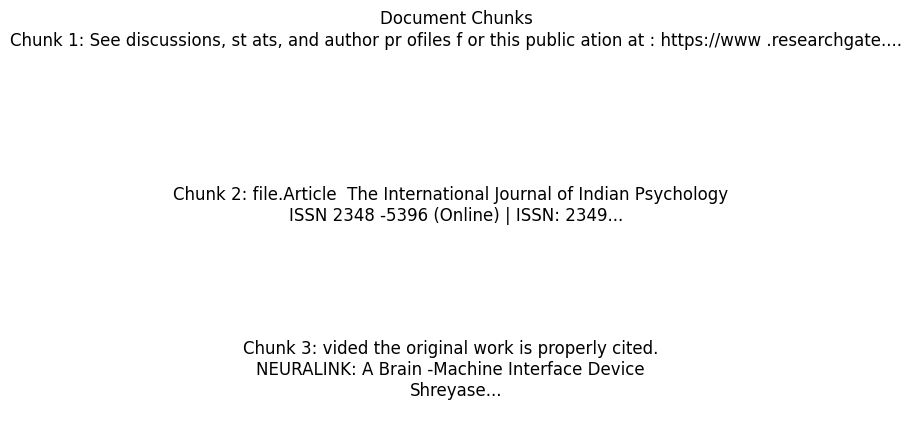

In [105]:
import matplotlib.pyplot as plt

# Example document chunks
document_chunks = [pdf_text[i:i + 512] for i in range(0, len(pdf_text), 512)]

# Plot a few chunks
plt.figure(figsize=(10, 5))
for i, chunk in enumerate(document_chunks[:3]):
    plt.text(0.5, 1 - i*0.4, f"Chunk {i+1}: {chunk[:100]}...", ha='center', va='top', fontsize=12)
plt.title('Document Chunks')
plt.axis('off')
plt.show()

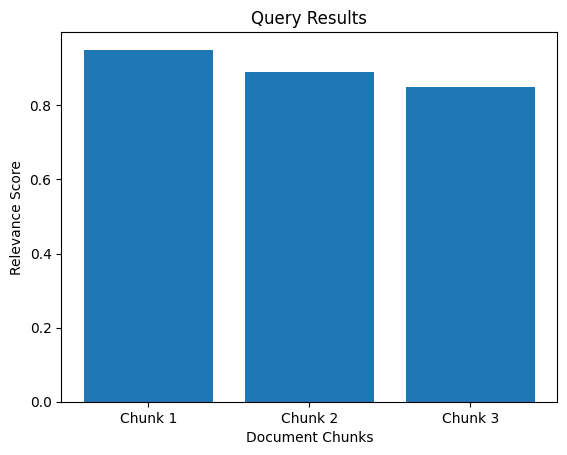

In [106]:
import matplotlib.pyplot as plt

# Simulate some query results
matches = [{'id': 0, 'score': 0.95}, {'id': 1, 'score': 0.89}, {'id': 2, 'score': 0.85}]
relevant_docs = [document_chunks[match['id']] for match in matches]

# Plot the relevance scores
scores = [match['score'] for match in matches]
plt.bar(range(len(scores)), scores, tick_label=[f"Chunk {i+1}" for i in range(len(scores))])
plt.xlabel('Document Chunks')
plt.ylabel('Relevance Score')
plt.title('Query Results')
plt.show()

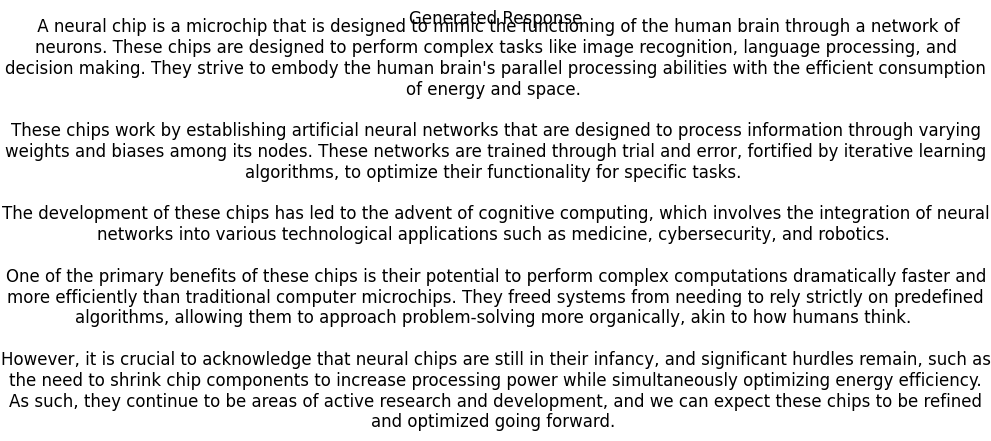

In [107]:
import matplotlib.pyplot as plt

# Example generated response
response_text = response.generations[0].text

plt.figure(figsize=(10, 5))
plt.text(0.5, 0.5, response_text, ha='center', va='center', fontsize=12, wrap=True)
plt.title('Generated Response')
plt.axis('off')
plt.show()
